In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# All the beneficial values and the volume of each of the items 
itemArray = [[5,3],[6,2],[1,4],[9,5],[2,8],[8,9],[4,10],[3,1],[7,6],[10,7]]
# Reminder itemArray[i][j] = i = the index of each item, j = 0 (beneficial values) and j = 1 (volume)

In [2]:
def generateGenotype():
    # Generate either 0 or 1
    randomGen = random.randint(0, 1)
    genotype = []
    i = 0
    
    # Assigning the genotype with either 1 or 0 (either if item is knapsack or not)
    while i < 10:
        randomGen = random.randint(0, 1)
        genotype.append(randomGen)
        i += 1
    return genotype

genotype = generateGenotype()
print("Genotype: show the items in the knapsack", genotype)

Genotype: show the items in the knapsack [1, 0, 0, 1, 1, 1, 0, 0, 1, 0]


In [3]:
# Fitness function to calculate the fitness of the given genotype 
def fitness(geno):
    # indexItems initialise to -1 so it can allign with the itemArray
    itemIndex = -1
    beneficialVal = 0
    volumeVal = 0
    
    for items in geno:
        itemIndex += 1
        # Find all the items present in the knapsack and find the beneficial values and also the volume associated with it
        if items == 1:
            # Calculate all the beneficial values and also the volumes present in the knapsack
            beneficialVal += itemArray[itemIndex][0]
            volumeVal += itemArray[itemIndex][1]
    return beneficialVal, volumeVal

benefit,capacity = fitness(genotype)
print("The beneficial value with the given knapsack:",benefit)
print("Capacity of all the items:",capacity)

The beneficial value with the given knapsack: 31
Capacity of all the items: 31


In [17]:
# Fitness function to calculate the fitness of the given genotype (Create a new genotype if the capacity of all the items > 20) 
def fitnessModify(geno):
    # indexItems initialise to -1 so it can allign with the itemArray
    itemIndex = -1
    beneficialVal = 0
    volumeVal = 0
    # Ensure that the generated genotype is within the capacity constraint
    invalid = 0
    
    while invalid == 0:
        if volumeVal <= 20 and volumeVal != 0:
            invalid = 1
            # Return a genotype thats within the constraint and its beneficial value as well as the capacity it will take
            return geno,beneficialVal, volumeVal
        else:
            itemIndex = -1
            beneficialVal = 0
            volumeVal = 0
            # Generate a new genotype due to invalid capacity
            geno = generateGenotype()
            

        # See which items is in and not in the knapsack   
        for items in geno:
            itemIndex += 1
            # Find all the items present in the knapsack and find the beneficial values and also the volume associated with it
            if items == 1:
                # Calculate all the beneficial values and also the volumes present in the knapsack
                beneficialVal += itemArray[itemIndex][0]
                volumeVal += itemArray[itemIndex][1]

genotype,benefit,capacity = fitnessModify(genotype)
print("The beneficial value with the given knapsack:",benefit)
print("Capacity of all the items:",capacity)
print(genotype)

The beneficial value with the given knapsack: 15
Capacity of all the items: 15
[0, 0, 0, 0, 0, 1, 0, 0, 1, 0]


In [5]:
# Mutation function to mutate the genotype by the given mutation rate
def mutation(geno, mutationRate):
    # Copy genotype into a temp genotype
    mutatedGeno = geno.copy()
    mutationIter = 0
    # Calculate the mutation rate (rounded down)
    rate = int(len(geno) * mutationRate)

    while mutationIter != rate:
        # Generate a unique itemIndex
        itemIndex = np.random.choice(np.arange(len(geno)), replace=False)
        # Assign the item to be in the knapsack (could already be in the sack already)
        mutatedGeno[itemIndex] = 1
        mutationIter += 1
    return mutatedGeno

mutatedGeno = mutation(genotype, 0.3)
print("Genotype:", genotype)
print("Mutated Genotype:", mutatedGeno)

Genotype: [1, 1, 1, 0, 0, 0, 1, 1, 0, 0]
Mutated Genotype: [1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


In [6]:
# Modify mutation function to mutate the genotype by the given mutation rate (item always changes)
def mutationModify(geno, mutationRate):
    # Copy genotype into a temp genotype
    mutatedGeno = geno.copy()
    mutationIter = 0
    # Calculate the mutation rate (rounded down)
    rate = int(len(geno) * mutationRate)

    while mutationIter != rate:
        # Generate a unique itemIndex
        itemIndex = np.random.choice(np.arange(len(geno)), replace=False)
        # If items is already in knapsack, take it out else add it in
        if geno[itemIndex] == 1:
            mutatedGeno[itemIndex] = 0
            mutationIter += 1
        else:
            mutatedGeno[itemIndex] = 1
            mutationIter += 1
    return mutatedGeno

mutatedGeno = mutationModify(genotype, 0.3)
print("Genotype:", genotype)
print("Mutated Genotype:", mutatedGeno)

Genotype: [1, 1, 1, 0, 0, 0, 1, 1, 0, 0]
Mutated Genotype: [1, 0, 1, 0, 0, 1, 1, 1, 0, 1]


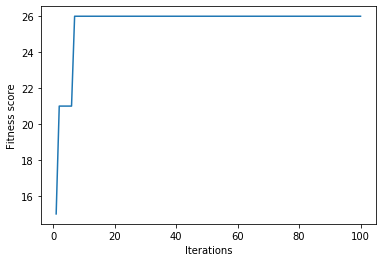

Currently the best genotype: [1, 1, 0, 0, 0, 1, 0, 0, 1, 0]
With a beneficial value of 26 and with a capacity of 20


In [18]:
# hillClimber function which uses the mutation fucntion (each 'gene' has a chance to mutate)
def hillClimber(geno0, geno1, mutationRate, iteration):
    # Original genotype
    benefit1,volumn1 = fitness(geno0)
    # Mutated genotype
    benefit2,volumn2 = fitness(geno1)
    # Our x-axis for our graph (time iteration)
    timeIteration = []
    # # Our y-axis for our graph (best fitness of each iteration)
    fitnessOverTime = []
    i = 1
    # Knapsack has a capacity of 20
    knapsackCapacity = 20
    
    while i != iteration+1:
        timeIteration.append(i)
        # Check if the mutation genotype is within the capacity contraint
        if volumn2 <= knapsackCapacity:
            # Check if the mutation genotype has a greater fitness compared with original genotype
            if benefit2 > benefit1:
                fitnessOverTime.append(benefit2)
                # If mutated genotype is better, assigned that to the original genotype
                geno0 = geno1
            else:
                fitnessOverTime.append(benefit1)
        else:
            fitnessOverTime.append(benefit1)
        i += 1
        # Selected gene will have a chance to mutate (have a chance to flip)
        geno1 = mutation(geno0, mutationRate)
        benefit1,volumn1 = fitness(geno0)
        benefit2,volumn2 = fitness(geno1)
   
    plt.plot(timeIteration,fitnessOverTime)
    plt.xlabel ('Iterations')
    plt.ylabel ('Fitness score')
    plt.show()
    print("Currently the best genotype:", geno0)
    print("With a beneficial value of {} and with a capacity of {}" .format(benefit1,volumn1))
hillClimber(genotype,mutatedGeno,0.1,100)

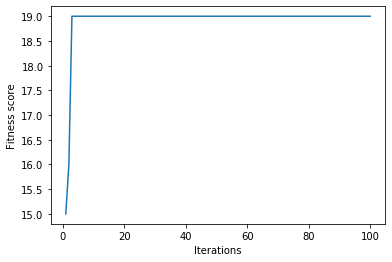

Currently the best genotype: [0, 0, 1, 0, 0, 1, 0, 1, 1, 0]
With a beneficial value of 19 and with a capacity of 20


In [19]:
# hillClimberModify function which uses the mutation modify fucntion (each 'gene' selected will mutate)
def hillClimberModify(geno0, geno1, mutationRate, iteration):
    # Original genotype
    benefit1,volumn1 = fitness(geno0)
    # Mutated genotype
    benefit2,volumn2 = fitness(geno1)
    # Our x-axis for our graph (time iteration)
    timeIteration = []
    # # Our y-axis for our graph (best fitness of each iteration)
    fitnessOverTime = []
    i = 1
    # Knapsack has a capacity of 20
    knapsackCapacity = 20
    
    while i != iteration+1:
        timeIteration.append(i)
        # Check if the mutation genotype is within the capacity contraint
        if volumn2 <= knapsackCapacity:
            # Check if the mutation genotype has a greater fitness compared with original genotype
            if benefit2 > benefit1:
                fitnessOverTime.append(benefit2)
                # If mutated genotype is better, assigned that to the original genotype
                geno0 = geno1
            else:
                fitnessOverTime.append(benefit1)
        else:
            fitnessOverTime.append(benefit1)
        i += 1
        # Selected gene will always mutate (flip)
        geno1 = mutationModify(geno0, mutationRate)
        benefit1,volumn1 = fitness(geno0)
        benefit2,volumn2 = fitness(geno1)
   
    plt.plot(timeIteration,fitnessOverTime)
    plt.xlabel ('Iterations')
    plt.ylabel ('Fitness score')
    plt.show()
    print("Currently the best genotype:", geno0)
    print("With a beneficial value of {} and with a capacity of {}" .format(benefit1,volumn1))
hillClimberModify(genotype,mutatedGeno,0.1,100)

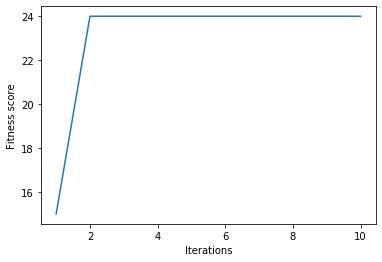

Currently the best genotype: [0, 0, 0, 1, 0, 1, 0, 0, 1, 0]
With a beneficial value of 24 and with a capacity of 20


In [9]:
# Experiment with a low mutation rate (0.1) and each gene has a chance to flip (mutate)
# random.seed is used to ensure all experiment is as control as possible
random.seed(2)
genoLowRand = generateGenotype()
random.seed(2)
genotypeLR,benefitLR,capacityLR = fitnessModify(genoLowRand)
random.seed(2)
mutateLowRand = mutation(genotypeLR, 0.1)
random.seed(2)
hillClimber(genotypeLR,mutateLowRand,0.1,10)

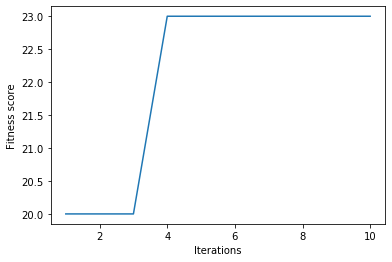

Currently the best genotype: [1, 0, 0, 0, 0, 1, 0, 1, 1, 0]
With a beneficial value of 23 and with a capacity of 19


In [10]:
# Experiment with a low mutation rate (0.1) and each gene will mutate if selected
random.seed(2)
genoLowMutate = generateGenotype()
random.seed(2)
genotypeLM,benefitLM,capacityLM = fitnessModify(genoLowMutate)
random.seed(2)
mutateLowMutate = mutationModify(genotypeLM, 0.1)
random.seed(2)
hillClimberModify(genotypeLM,mutateLowMutate,0.1,10)

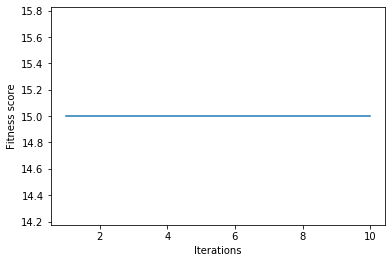

Currently the best genotype: [0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
With a beneficial value of 15 and with a capacity of 15


In [11]:
# Experiment with a high mutation rate (0.8) and each gene has a chance to flip (mutate)
random.seed(2)
genoHighRand = generateGenotype()
random.seed(2)
genotypeHR,benefitHR,capacityHR = fitnessModify(genoHighRand)
random.seed(2)
mutateHighRand = mutation(genotypeHR, 0.8)
random.seed(2)
hillClimber(genotypeHR,mutateHighRand,0.8,10)

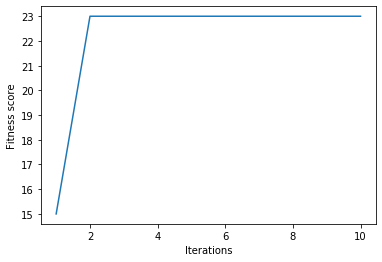

Currently the best genotype: [1, 1, 0, 0, 1, 0, 0, 1, 1, 0]
With a beneficial value of 23 and with a capacity of 20


In [12]:
# Experiment with a high mutation rate (0.8) and each gene will mutate if selected
random.seed(2)
genoHighMutate = generateGenotype()
random.seed(2)
genotypeHM,benefitHM,capacityHM = fitnessModify(genoHighMutate)
random.seed(2)
mutateHighMutate = mutationModify(genotypeHM, 0.8)
random.seed(2)
hillClimberModify(genotypeHM,mutateHighMutate,0.8,10)

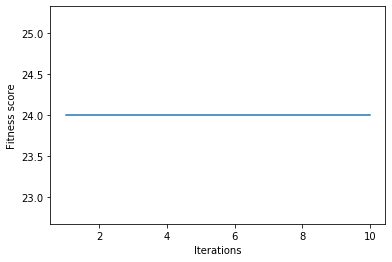

Currently the best genotype: [0, 0, 0, 1, 0, 1, 0, 0, 1, 0]
With a beneficial value of 24 and with a capacity of 20


In [13]:
# Experiment with a average mutation rate (0.4) and each gene has a chance to flip (mutate)
random.seed(2)
genoAverageRand = generateGenotype()
random.seed(2)
genotypeAR,benefitAR,capacityAR = fitnessModify(genoAverageRand)
random.seed(2)
mutateAverageRand = mutation(genotypeAR, 0.4)
random.seed(2)
hillClimber(genotypeAR,mutateAverageRand,0.4,10)

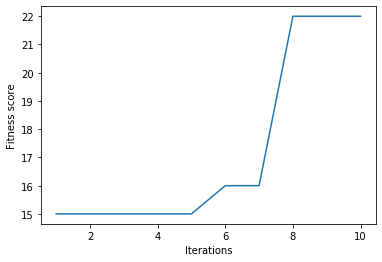

Currently the best genotype: [1, 0, 1, 1, 0, 0, 0, 0, 1, 0]
With a beneficial value of 22 and with a capacity of 18


In [14]:
# Experiment with a average mutation rate (0.4) and each gene will mutate if selected
random.seed(2)
genoAverageMutate = generateGenotype()
random.seed(2)
genotypeAM,benefitAM,capacityAM = fitnessModify(genoAverageMutate)
random.seed(2)
mutateAverageMutate = mutationModify(genotypeAM, 0.4)
random.seed(2)
hillClimberModify(genotypeAM,mutateAverageMutate,0.4,10)

In [ ]:
# Demonstrating that a local minima exist but not a globally optimal solution
